In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }
plt.rcParams.update(parameters)


In [2]:
# Parameters
N = 6e6 # population_size

nu = 1/5 # recovery rate
mu = 0 #1/(80*365) # mortality rate

Q0 = 1.8 # reproduction number
beta = (nu + mu)*Q0 # infectivity (rate)
def print_params():
    print(f"Q0 = {Q0}")
    print(f"beta, nu, mu = {params}")
    print(f"Final size: {final_size}")

t_max = 150
t = np.linspace(0, t_max, 200) # range for time

formats = ["pdf", "png"]
savepath = "figs/"

def deriv(state, t, beta, nu, mu):
    S, I, R = state
    dS_dt = mu*N - beta*S*I/N - mu*S
    dI_dt = beta*S*I/N - nu*I - mu*I
    dR_dt = nu*I - mu*R
    return np.array([dS_dt, dI_dt, dR_dt])

def gillespie_SIR(state_sir, beta, nu, mu):
    S, I, R = state_sir
    N = S+I+R
    t = 0
    ret_state = []
    ret_state.append([t, S, I, R])
    while I>0:
        # find time to next event:
        r_t, r_e = np.random.uniform(0, 1, 2)
        tot = beta*S*I/N + nu*I
        t += - np.log(r_t)/tot
        # find event type:
        if r_e < nu*I/tot:
            I -= 1; R += 1
        else:
            S -= 1; I += 1
        
        ret_state.append([t, S, I, R])
    return np.array(ret_state)


Q0 = 1.8
beta, nu, mu = (0.36000000000000004, 0.2, 0)
Final size: 0.7322505491801818


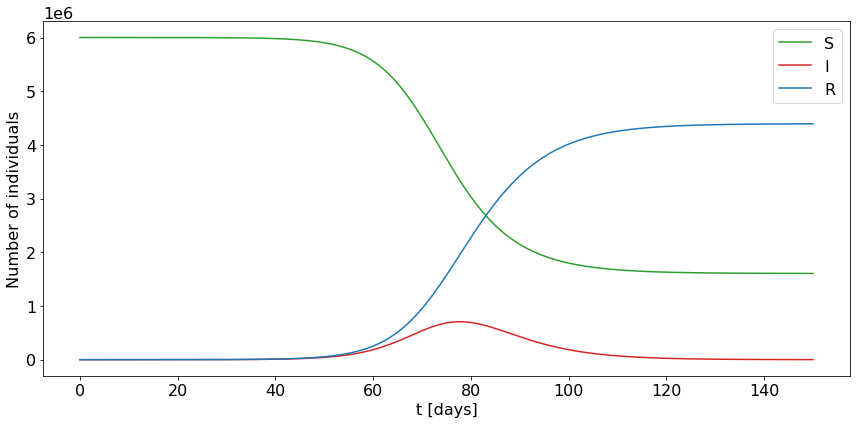

In [3]:
# (a) SIR-modelling Denmark (naive)
I0 = 15
state_init = np.array([N-I0, I0, 0])
params = (beta, nu, mu)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol
final_size = 1 - S[-1]/N

print_params()

#I_max = lambda N, Q0, state_init: N - (N/Q0)*(1-np.log(1/((Q0/N)*state_init[0])))
# I_max = N - (N/Q0)*(1-np.log(1/((Q0/N)*state_init[0])))
# works! 
# print(I_max)

clr = [f"tab:{c}" for c in ["green", "red", "blue"]]
lbl = ["S", "I", "R"]

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i])
#ax.axhline(I_max, label="$I_{max}$")
ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()

#for e in formats:
#    plt.savefig(savepath+"logistic_numerical_analytical."+e)
# plt.show()

# I_max = N - (1/Q0)*(1-np.log(1/(Q0*state_init[0])))


Q0 = 1.9800000000000002
beta, nu, mu = (0.3960000000000001, 0.2, 0)
Final size: 0.7912575063789374


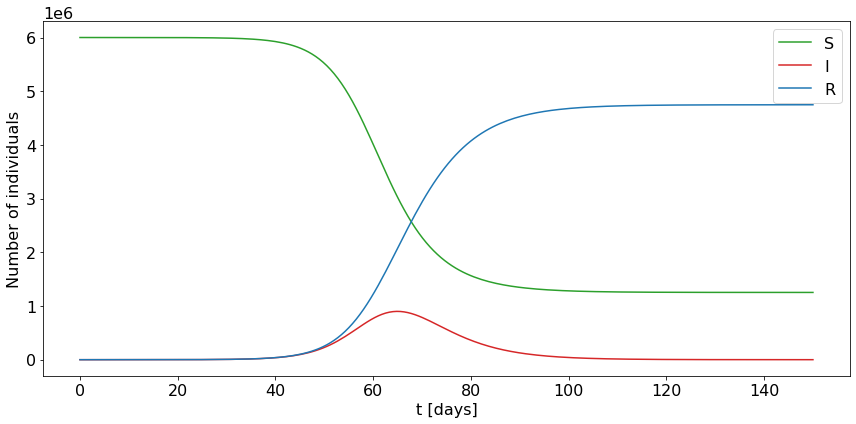

In [4]:
# (b) increase beta by 10%
beta = beta * 1.1 # infectivity (rate)
Q0 = beta/(nu + mu) # reproduction number

state_init = np.array([N-I0, I0, 0])
params = (beta, nu, mu)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol
final_size = 1 - S[-1]/N

print_params()

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i])

ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()



In [5]:
# (b) pt 2: duration of epidemic

# state_init
# params
# g_sol = gillespie_SIR([1000000-15, 15, 0], *params).T
# plt.plot(g_sol[0], g_sol[1:].T)


heard immunity at I=1-1/Q0=0.4444444444444444


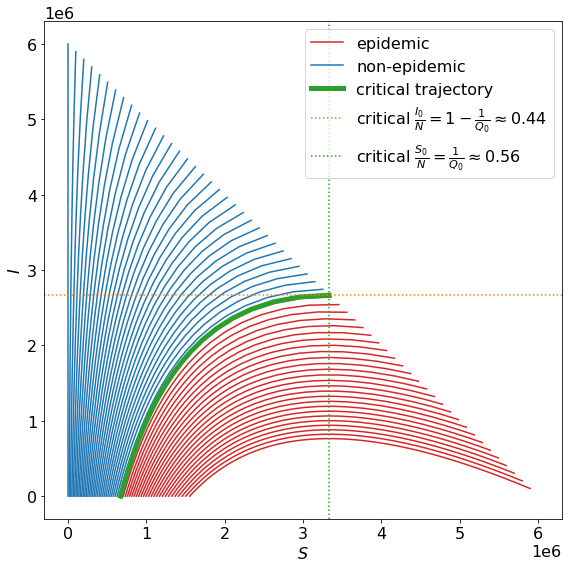

In [6]:
# (c) Phase space plotting:

Q0 = 1.8 # reproduction number
beta = (nu + mu)*Q0 # infectivity (rate)

print(f"heard immunity at I=1-1/Q0={1-1/Q0}")

fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)

I0s = np.linspace(0, int(6e6), 60)
for I0 in I0s:
    
    col_cond = (I0/N >= 1-1/Q0)
    c = int(col_cond)*"tab:blue" + (1-int(col_cond))*"tab:red"
        
    state_init = np.array([N-I0, I0, 0])
    params = (beta, nu, mu)

    num_sol = odeint(deriv, state_init, t, args=params).T
    S, I, R = num_sol
    final_size = 1 - S[-1]/N
    
    lab = int(I0 == I0s[0])*"epidemic" + int(I0 == I0s[-1])*"non-epidemic"
    ax.plot(S, I, color=c, label=lab)
        
heard_immune = (1-1/Q0)
I0 = (1-1/Q0)*N
state_init = np.array([N-I0, I0, 0])
params = (beta, nu, mu)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol
ax.plot(S, I, color="tab:green", linewidth=5, alpha=1,
        label="critical trajectory")
ax.axhline(N*(1-1/Q0), color="tab:orange", linestyle=":", 
           label="critical $\\frac{I_{0}}{N}=1-\\frac{1}{Q_{0}} \\approx $" + str(round(1-1/Q0,2)))
ax.axvline(N/Q0, color="tab:green", linestyle=":", 
           label="critical $\\frac{S_{0}}{N}=\\frac{1}{Q_{0}} \\approx$"+str(round(1/Q0,2)))

ax.set_xlabel("$S$")
ax.set_ylabel("$I$")
# ax.set_yscale("log")
ax.legend()
 

Note that below the limit for heard-immunity, there is no initial rise in the number of infected.
The condition for heard immunity is $S = 1/Q_{0}$, normally expressed as:
$p = 1-\frac{1}{Q_{0}}$, where $p = 1-S$

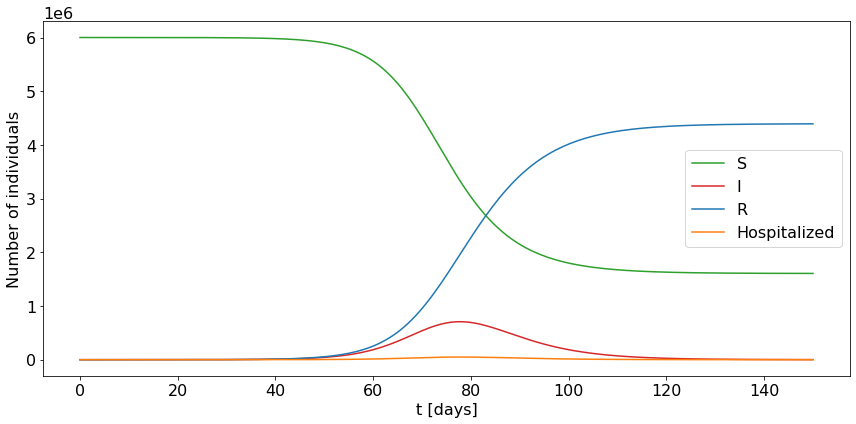

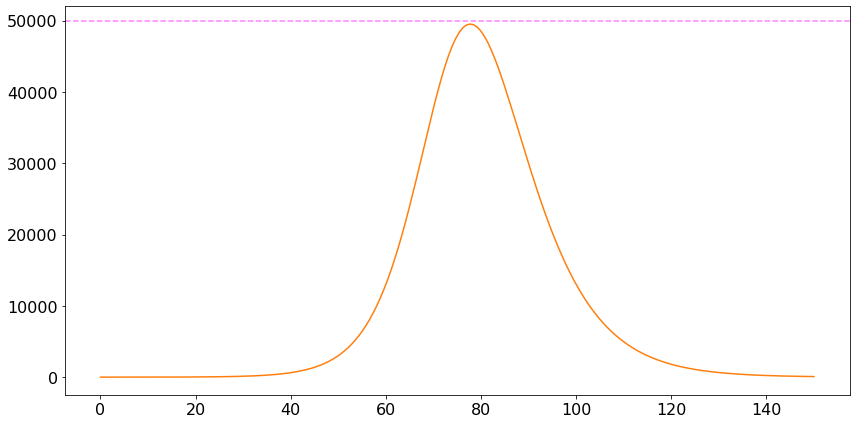

In [7]:
# (d) hospitalizations: Simple model
I0 = 15
h = 0.07
mu = 0
hosp_crit = 5e4

t_max = 150
t = np.linspace(0, t_max, 200) # range for time

state_init = np.array([N-I0, I0, 0])
params = (beta, nu, mu)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol
final_size = 1 - S[-1]/N

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i])
ax.plot(t, I*h, color="tab:orange", label="Hospitalized")

ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()
    
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
ax.plot(t, I*h, color="tab:orange", label="Hospitalized")
ax.axhline(hosp_crit, color="magenta", linestyle="--", alpha=0.5)




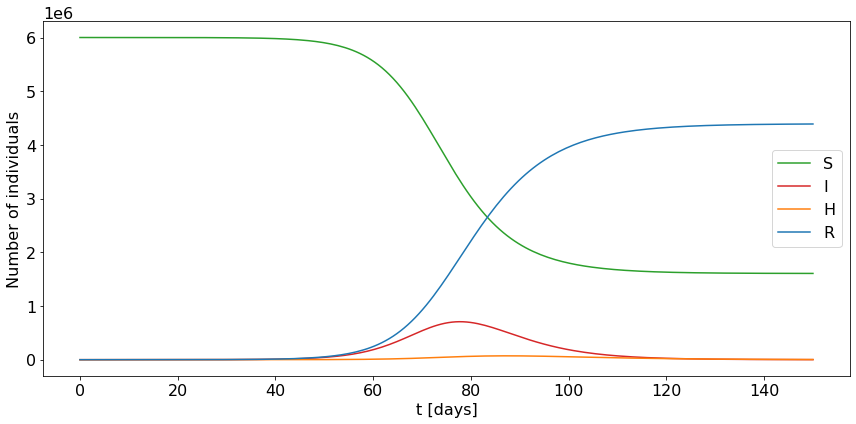

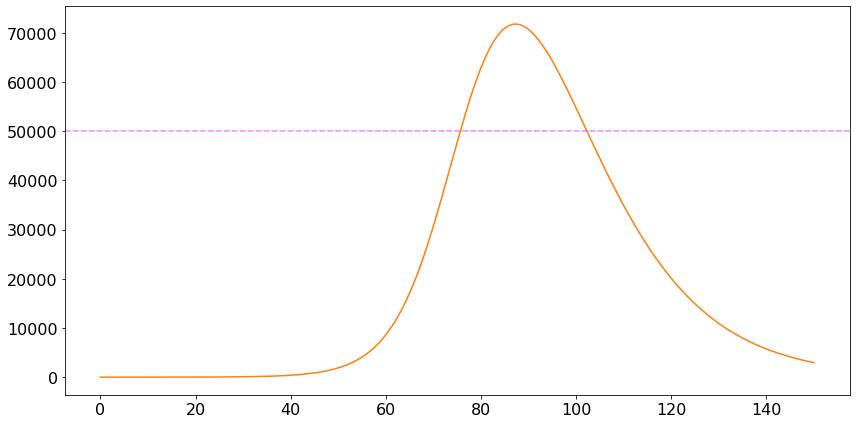

In [8]:
# (d) hospitalizations: more realistic model
I0 = 15
h = 0.05
mu = 0
eta = 1/14
hosp_crit = 5e4

def deriv(state, t, beta, nu, mu, h, eta):
    S, I, H, R = state
    dS_dt = mu*N - beta*S*I/N - mu*S
    dI_dt = beta*S*I/N - nu*I - mu*I
    dH_dt = h*nu*I - eta*H - mu*H    
    dR_dt = (1-h)*nu*I + eta*H - mu*R
    return np.array([dS_dt, dI_dt, dH_dt, dR_dt])

t_max = 150
t = np.linspace(0, t_max, 200) # range for time

state_init = np.array([N-I0, I0, 0, 0])
params = (beta, nu, mu, h, eta)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, H, R = num_sol
final_size = 1 - S[-1]/N

clr_hosp = [f"tab:{c}" for c in ["green", "red", "orange", "blue"]]
lbl_hosp = ["S", "I", "H", "R"]

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr_hosp[i], label=lbl_hosp[i])

ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()
    
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
ax.plot(t, H, color="tab:orange", label="Hospitalized")
#ax.plot(t, (h*nu/eta)*I, color="tab:orange", label="Hospitalized")

ax.axhline(hosp_crit, color="magenta", linestyle="--", alpha=0.5)




Text(0, 0.5, '$I$')

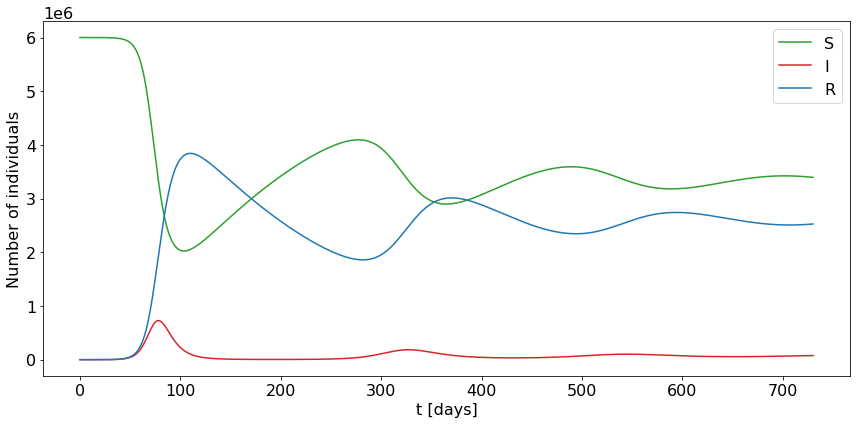

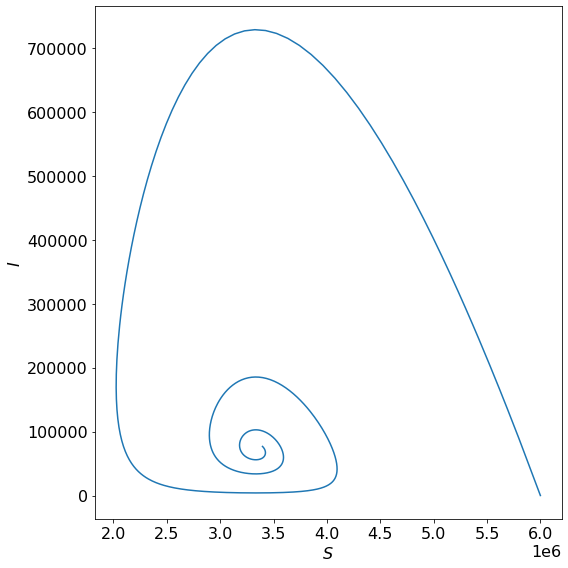

In [9]:
# (e) SIRS model (loss of immunity)
yr = 365

t_max = yr*2
t = np.linspace(0, t_max, 1000) # range for time

rho = 1/(yr/2)

def deriv(state, t, beta, nu, mu, rho):
    S, I, R = state
    dS_dt = mu*N - beta*S*I/N - mu*S + rho*R
    dI_dt = beta*S*I/N - nu*I - mu*I
    dR_dt = nu*I - mu*R - rho*R
    return np.array([dS_dt, dI_dt, dR_dt])

state_init = np.array([N-I0, I0, 0])
params = (beta, nu, mu, rho)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol
final_size = 1 - S[-1]/N

# Making dynamic plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i])

ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()
    
# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I)

ax.set_xlabel("$S$")
ax.set_ylabel("$I$")
# ax.set_yscale("log")
# ax.legend()


Note that the system eventually settles at a single point, making this a stabile system.

(0.36000000000000004, 0.2, 0, 0, 0.0027397260273972603)


Text(0, 0.5, '$I$')

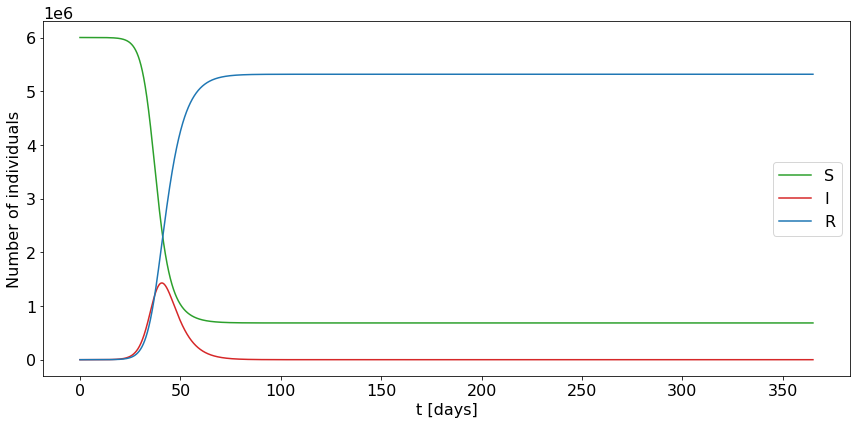

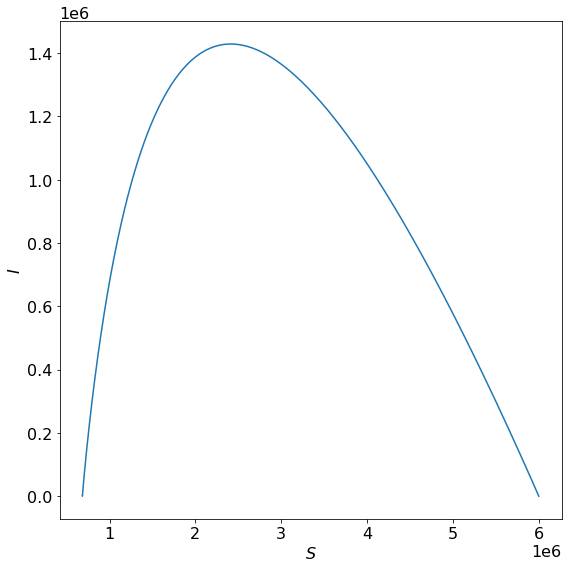

In [10]:
# (e) periodically driven infectivity (SIR)
freq = 1/yr # 20/yr periodicity freq needs to be very high, in order to see it in "raw" phase space
rho = 0 # 100/yr
mu = 0
#beta = 4

t_max = yr*1
t = np.linspace(0, t_max, 5000) # range for time

def deriv(state, t, beta, nu, mu, rho, freq):
    S, I, R = state
    A = 0.5
    b_t = beta*(1 + A*np.cos(2*np.pi*t*freq))
    dS_dt = mu*N - b_t*S*I/N - mu*S + rho*R
    dI_dt = b_t*S*I/N - nu*I - mu*I
    dR_dt = nu*I - mu*R - rho*R
    return np.array([dS_dt, dI_dt, dR_dt])

state_init = np.array([N-I0, I0, 0])
params = (beta, nu, mu, rho, freq)
print(params)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol
final_size = 1 - S[-1]/N

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i])

ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()

# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I)

ax.set_xlabel("$S$")
ax.set_ylabel("$I$")
# ax.set_yscale("log")
# ax.legend()

(0.36000000000000004, 0.2, 0, 0.0016604400166044002, 0.0027397260273972603)


Text(0, 0.5, '$I$')

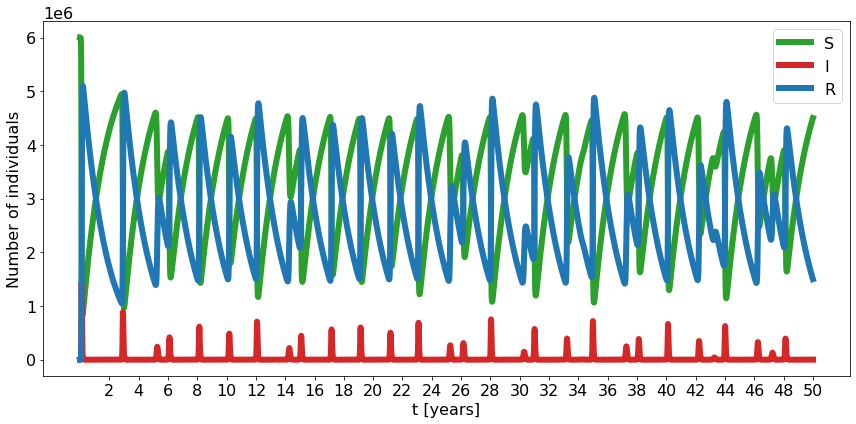

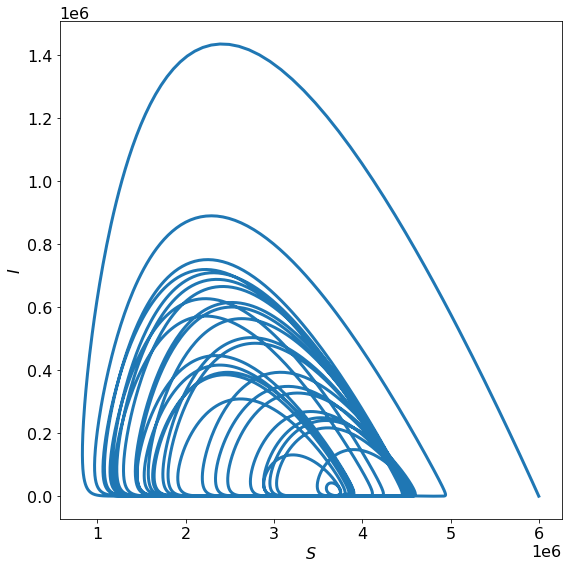

In [13]:
# (e) periodically driven infectivity (SIRS), 
# (resonance rho = 1/(yr/2))
# (chaotic behaviour (A=0.5, rho = 1/(1.65*yr))
freq = 1/yr
rho = 1/(1.65*yr) # 1/(1.*yr)
mu = 0
#beta = 4

num_yrs = 50
t_max = yr*num_yrs
t = np.linspace(0, t_max, 50000) # range for time

def deriv(state, t, beta, nu, mu, rho, freq):
    S, I, R = state
    A = 0.5
    b_t = beta*(1 + A*np.cos(2*np.pi*t*freq))
    dS_dt = mu*N - b_t*S*I/N - mu*S + rho*R
    dI_dt = b_t*S*I/N - nu*I - mu*I
    dR_dt = nu*I - mu*R - rho*R
    return np.array([dS_dt, dI_dt, dR_dt])

state_init = np.array([N-I0, I0, 0])
params = (beta, nu, mu, rho, freq)
print(params)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol
final_size = 1 - S[-1]/N

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i], linewidth=6)

ax.set_xticks([i*yr for i in range(1,num_yrs+1) if i%2==0])
ax.set_xticklabels([str(i) for i in range(1,num_yrs+1) if i%2==0])
ax.set_xlabel("t [years]")

#ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()

# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I, linewidth=3)

ax.set_xlabel("$S$")
ax.set_ylabel("$I$")
# ax.set_yscale("log")
# ax.legend()

Note that the system "settles" at a stable periodic orbit in phase-space, making this a system setteling on a limit-cycle. (for the resonance conditions) and strange attractor (for chaotic condition)

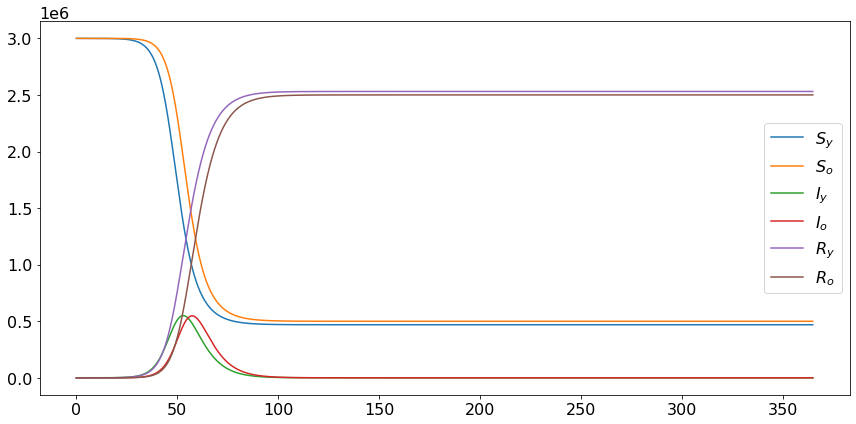

In [14]:
# (h) structured population
# Vital dynamics in this model do not yet work properly... currently mu=0 should be used.

t_max = yr*1
t = np.linspace(0, t_max, 5000) # range for time

def deriv(state, t, beta, nu, mu):
    # parameters mu, nu are currently scalars and used as "baseline"
    # All parameters below should be vectorized to reflect structural difference...
    # beta is a matrix, determining the interaction in infections.
    nu_ar = np.array([nu, nu])
    mu_ar = np.array([mu, mu])
    vital_ar = np.array([sum(mu_ar), 0])
    
    num_compart, l = 3, len(state)
    # State should be a 1d-array (np.array) such that [s1, ... , sn, i1, ... , in, r1, ... rn]
    state = state.reshape(num_compart,int(l/num_compart)) #reshaping into more reasonable structure
    S, I, R = state
    pop_ar = S + I + R
    #print(type(vital_ar), type(pop_ar))
    lamb = np.dot(beta, I) # force of infection
    dS_dt, dI_dt, dR_dt = np.zeros((3,2)) # initializing derivatives
    for i in range(len(state[0])):
        infect, recover = lamb[i]*S[i]/N, nu_ar[i]*I[i]# infection and recovery term
        vital = vital_ar[i]*pop_ar[i]
        dS_dt[i] = vital - infect - mu_ar[i]*S[i]
        dI_dt[i] = infect - recover - mu_ar[i]*I[i]
        dR_dt[i] = recover - mu_ar[i]*R[i]
    return np.array([dS_dt, dI_dt, dR_dt]).flatten() # returning flat 1-d array

#rat_y = 0.5
I0 = np.array([15, 0])
N_ar = np.array([N/2]*2)

beta_ar = nu*np.array([[4.3, 0.1], [0.1, 4.2]])
mu = 0 #1/(2*365)

params = (beta_ar, nu, mu)
state_init = np.array([N_ar-I0, I0, np.zeros(2)]).flatten()

num_sol = odeint(deriv, state_init, t, args=params).T
#print(num_sol)
#S, I, R = num_sol.reshape
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
ax.plot(t, num_sol.T)
lbls = ["$S_{y}$", "$S_{o}$", "$I_{y}$", "$I_{o}$", "$R_{y}$", "$R_{o}$"]
ax.legend(lbls)

#final_size = 1 - S[-1]/N


Text(0, 0.5, '$I$')

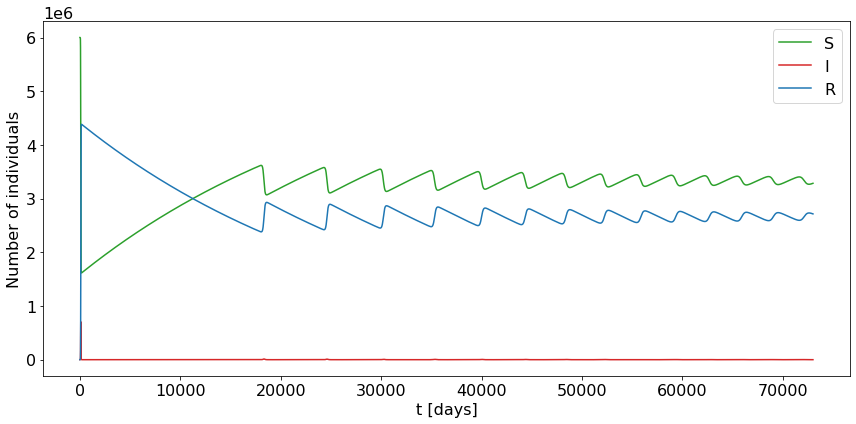

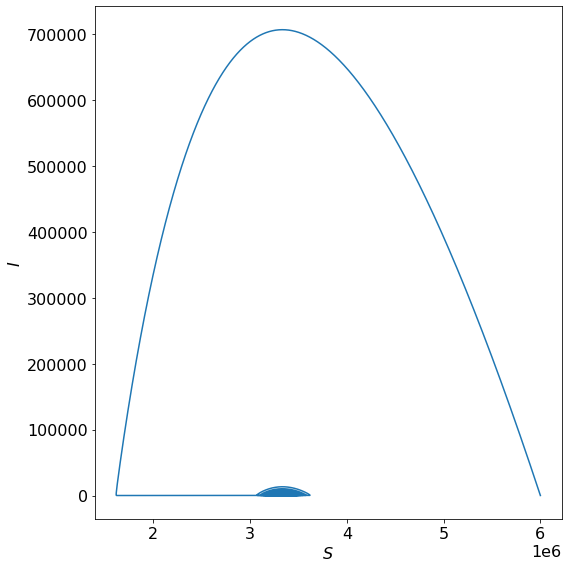

In [15]:
# (j) SIR w. vital dynamics
mu = 1/(80*yr)

I0 = 15

t_max = yr*200
t = np.linspace(0, t_max, 50*t_max) # range for time

def deriv(state, t, beta, nu, mu):
    S, I, R = state
    dS_dt = mu*N - beta*S*I/N - mu*S
    dI_dt = beta*S*I/N - nu*I - mu*I
    dR_dt = nu*I - mu*R 
    return np.array([dS_dt, dI_dt, dR_dt])

state_init = np.array([N-I0, I0, 0])
params = (beta, nu, mu)

num_sol = odeint(deriv, state_init, t, args=params).T
S, I, R = num_sol
final_size = 1 - S[-1]/N

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i])

ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()

# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I)

ax.set_xlabel("$S$")
ax.set_ylabel("$I$")
# ax.set_yscale("log")
# ax.legend()

vital dynamics also introduces waves, though over much longer timescales...